In [1]:
import os
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import random
from utils import listdirNHF, form_mask_from_roi
from co_localization_measurements import measure_pixels_overlap, measure_regions_distances


In [2]:
#Define input and output folders
input_folder = r"/Users/ulivia/Desktop/Alessandro/projects/test_image_quantification/rooth/input_folder/240125_AU_ACR074_Halo646_emb3"
output_folder = r"/Users/ulivia/Desktop/Alessandro/projects/test_image_quantification/rooth/output_folder/240125_AU_ACR074_Halo646_emb3"

#Define the target files
target_input_1 = "240125_AU_ACR074_Halo646_emb3__cyk1_puncta.ome.tif"
target_input_2 = "240125_AU_ACR074_Halo646_emb3__arx2_puncta.ome.tif"

#Open input files
input_file_1_path = os.path.join(input_folder, target_input_1)
input_file_2_path = os.path.join(input_folder, target_input_2)
input_file_1 = tifffile.imread(input_file_1_path)
input_file_2 = tifffile.imread(input_file_2_path)

#Select a single mask, to begin with
input_file_1_2D = input_file_1[0,...]
input_file_2_2D = input_file_2[0,...]

print(input_file_1_2D.shape)
print(input_file_2_2D.shape)

#Open roi file and form a mask with it
roi_file_directory = r"/Users/ulivia/Desktop/Alessandro/projects/test_image_quantification/rooth/roi_files/240125_AU_ACR074_Halo646_emb3/0032-0427-0363.roi"
roi_mask = form_mask_from_roi(roi_file_directory, input_file_1_2D)
print(roi_mask.shape)


(928, 684)
(928, 684)
(928, 684)


In [4]:
test_1 = measure_pixels_overlap(input_file_1_2D,
                                input_file_2_2D,
                                n_px_thr_1=1,
                                n_px_thr_2=0,
                                roi_mask=False,
                                shuffle_times=0,
                                val_threshold_arr_1=0,
                                val_threshold_arr_2=0)

test_2 = measure_pixels_overlap(input_file_1_2D,
                                input_file_2_2D,
                                n_px_thr_1=1,
                                n_px_thr_2=0,
                                roi_mask=roi_mask,
                                shuffle_times=0,
                                val_threshold_arr_1=0,
                                val_threshold_arr_2=0)

test_3 = measure_pixels_overlap(input_file_1_2D,
                                input_file_2_2D,
                                n_px_thr_1=1,
                                n_px_thr_2=0,
                                roi_mask=False,
                                shuffle_times=7,
                                val_threshold_arr_1=0,
                                val_threshold_arr_2=0)

test_4 = measure_pixels_overlap(input_file_1_2D,
                                input_file_2_2D,
                                n_px_thr_1=1,
                                n_px_thr_2=0,
                                roi_mask=roi_mask,
                                shuffle_times=7,
                                val_threshold_arr_1=0,
                                val_threshold_arr_2=0)

# (928, 684)
# (928, 684)
# (176,)
# (167201,)
# (167201,)
# (176,)

# (928, 684)
# (928, 684)
# (1254,)
# 1254
# (167201,)
# (167201,)
# (1254,)
# 1254

print(test_1)
print(test_2)
print(test_3)
print(test_4)



(np.float64(0.2215909090909091),)
(np.float64(0.2215909090909091),)
(np.float64(0.2215909090909091), [np.float64(0.0), np.float64(0.005681818181818182), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)])
(np.float64(0.2215909090909091), [np.float64(0.011363636363636364), np.float64(0.011363636363636364), np.float64(0.011363636363636364), np.float64(0.022727272727272728), np.float64(0.0), np.float64(0.011363636363636364), np.float64(0.005681818181818182)])


In [31]:
test_5 = measure_regions_distances(input_file_1_2D,
                                   input_file_2_2D,
                                   roi__mask=None,
                                   desired__distance='min',
                                   transform_to_label_img=True,
                                   binary_mask_target_thres=0)

# test_5 = measure_regions_distances(input_file_1_2D,
#                                    input_file_2_2D,
#                                    roi__mask=None,
#                                    desired__distance='max',
#                                    transform_to_label_img=True,
#                                    binary_mask_target_thres=0)

# test_5 = measure_regions_distances(input_file_1_2D,
#                                    input_file_2_2D,
#                                    roi__mask=roi_mask,
#                                    desired__distance='min',
#                                    transform_to_label_img=True,
#                                    binary_mask_target_thres=0)

# test_5 = measure_regions_distances(input_file_1_2D,
#                                    input_file_2_2D,
#                                    roi__mask=roi_mask,
#                                    desired__distance='max',
#                                    transform_to_label_img=True,
#                                    binary_mask_target_thres=0)

# test_5 = measure_regions_distances(input_file_1_2D,
#                                    input_file_2_2D,
#                                    roi__mask=roi_mask,
#                                    desired__distance='mean',
#                                    transform_to_label_img=True,
#                                    binary_mask_target_thres=0)

# print(test_5)

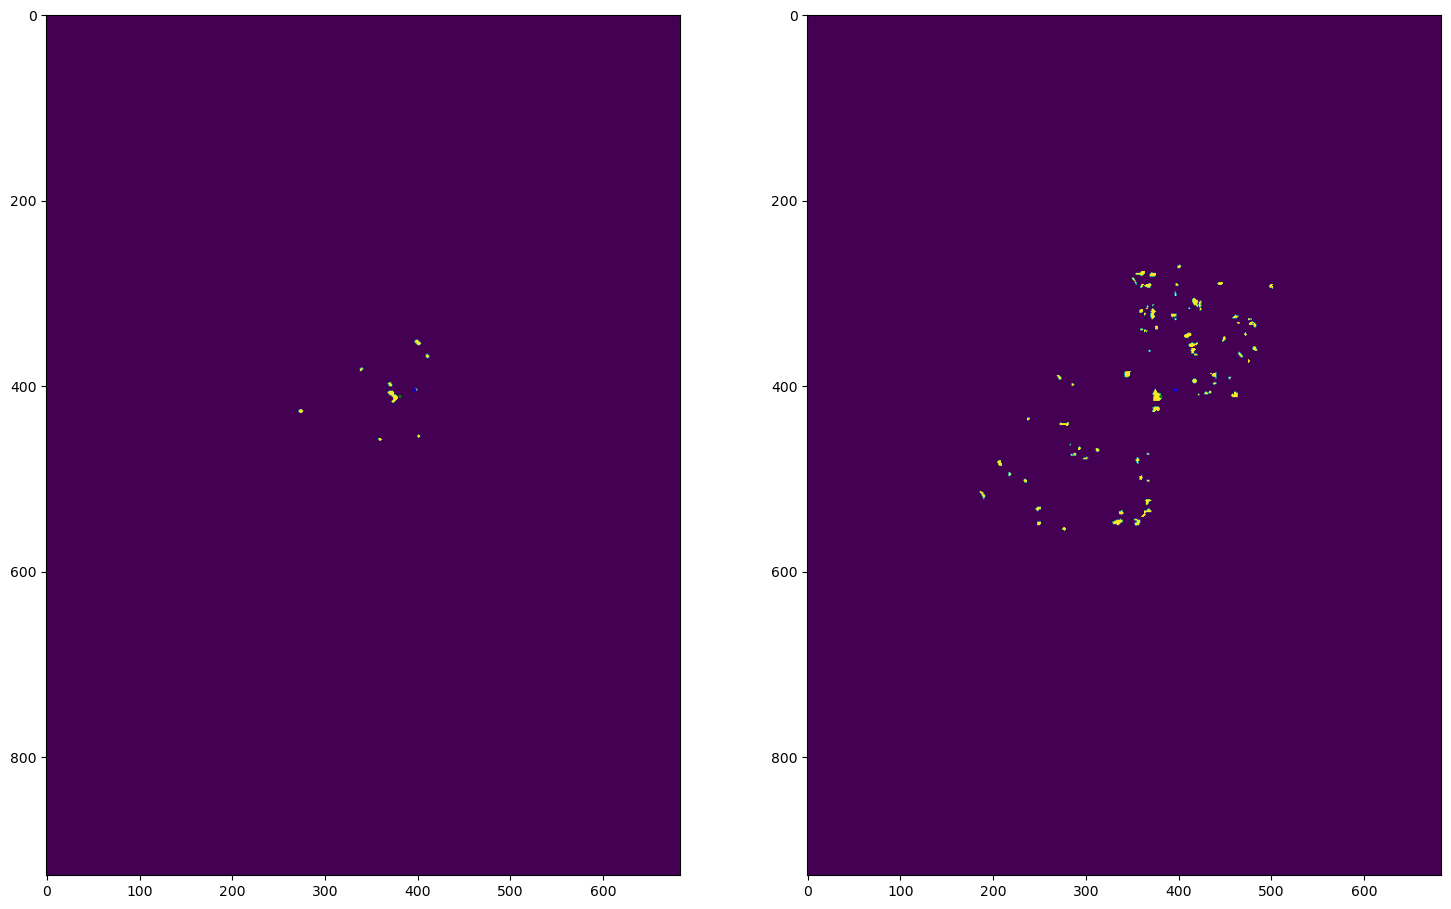

In [32]:
#Visualize a random coordinates pair

#Initialize an image
fig, ax = plt.subplots(1,2, figsize=(18,16))
ax[0].imshow(input_file_1_2D)
ax[1].imshow(input_file_2_2D)

#select a random pixel pair
r_pxl_1 = random.choice(list(test_6[1]))
r_pxl_2 = test_6[1][r_pxl_1]

#Add r_pxl_1 to the image as a blue circle patch
rpx1_patch_1 = plt.Circle((r_pxl_1[1],r_pxl_1[0]),radius=1,color='blue')
ax[0].add_patch(rpx1_patch_1)
rpx1_patch_2 = plt.Circle((r_pxl_1[1],r_pxl_1[0]),radius=1,color='blue')
ax[1].add_patch(rpx1_patch_2)

#Add r_pxl_2 to the image as a green circle patch
rpx2_patch_1 = plt.Circle((r_pxl_2[1],r_pxl_2[0]),radius=1,color='green')
ax[0].add_patch(rpx2_patch_1)
rpx2_patch_2 = plt.Circle((r_pxl_2[1],r_pxl_2[0]),radius=1,color='green')
ax[1].add_patch(rpx2_patch_2)


